In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('data/items.csv')

In [13]:
df.head()

,Length(in mm),Width (in mm),Sheet Cost(in Rs.)
0,600,600,1750
1,610,460,7890
2,1050,300,2350
3,914,560,10500
4,1050,610,11500


In [14]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [17]:
X_test=scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "GradientBoost": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5193.5791
- Mean Absolute Error: 4331.1162
- R2 Score: 0.7958
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5891.9425
- Mean Absolute Error: 4303.4673
- R2 Score: 0.5952


Lasso
Model performance for Training set
- Root Mean Squared Error: 5193.5792
- Mean Absolute Error: 4331.1387
- R2 Score: 0.7958
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5892.2596
- Mean Absolute Error: 4303.7611
- R2 Score: 0.5951


Ridge
Model performance for Training set
- Root Mean Squared Error: 5195.7228
- Mean Absolute Error: 4321.2632
- R2 Score: 0.7957
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5880.8586
- Mean Absolute Error: 4315.0195
- R2 Score: 0.5967


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4657.7450
- Mean Absolute Error: 2992.0074


In [21]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by="R2_score",ascending=False)

,Model Name,R2_score
4,Decision Tree,0.913619
6,XGBRegressor,0.874619
7,GradientBoost,0.864066
8,AdaBoost Regressor,0.846435
5,Random Forest Regressor,0.788356
2,Ridge,0.596688
0,Linear Regression,0.595166
1,Lasso,0.595122
3,K-Neighbors Regressor,0.550480


In [22]:
rf_params={
    "max_depth":[None,5,10,15,20],
    "max_features":[1,5,8,16],
    "min_samples_split":[1,2,4,8,16],
    "n_estimators":[100,200,500,1000]
}

ada_params={
    "n_estimators":[100,150,200,500],
    "loss":['linear', 'square', 'exponential'],
    "learning_rate":[0.1,0.01,0.001]
}

grad_params={
    "n_estimators":[100,150,200,500],
    "loss": ['squared_error','absolute_error', 'huber', 'quantile'],
    "learning_rate":[0,1,0.01],
    "min_samples_split":[1,2,4,8,16,32],
    "min_samples_leaf":[1,2,10,20]
}

xg_params={
    "learning_rate":[0.1,0.01],
    "max_depth":[5,8,12,20,30],
    "n_estimators":[100,200,300],
    "colsample_bytree":[0.5,0.8,1,0.3,0.4]
}

In [23]:
randomcv_models=[
                    ("RF",RandomForestRegressor(),rf_params),
                    ("Adaboost",AdaBoostRegressor(),ada_params),
                    ("Gradboost",GradientBoostingRegressor(),grad_params),
                    ("XGboost",XGBRegressor(),xg_params)
]

In [24]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"-------Best params for {model_name}----------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[CV] END max_depth=5, max_features=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=8, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=None, max_features=16, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_depth=10, max_features=5, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_depth=None, max_features=16, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_depth=10, max_features=16, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=5, min_samples_split=1, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=5, min_samples_split=1, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, 

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
66 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/A

[CV] END ...learning_rate=0.1, loss=square, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, loss=square, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, loss=square, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, loss=square, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.1, loss=square, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=500; total time=   0.3s
[CV] END ...learning_rate=0.1, loss=square, n_estimators=200; total time=   0.1s
[CV] END learning_

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
57 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/A

[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=300; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=12, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=300; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=30, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=12, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=20, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=8, n_estimators=300; total tim

In [25]:
models={
    "Random forest": RandomForestRegressor(n_estimators=200,min_samples_split=2,max_features=8,max_depth=None),
    "Adaboost": AdaBoostRegressor(n_estimators=150,loss='linear',learning_rate=0.01),
    "GradientBoost": GradientBoostingRegressor(n_estimators=150,min_samples_split=4,min_samples_leaf=1,loss='huber',learning_rate=1),
    "XGboost": XGBRegressor(n_estimators=100,max_depth= 8, learning_rate= 0.1, colsample_bytree= 0.3)
}
model_list = []
r2_list =[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae,model_train_mse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model performance for training dataset')
    print("- Mean Absolute error:{:.4f}".format(model_train_mae))
    print("- Mean Squared error:{:.4f}".format(model_train_mse))
    print("-R2 score:{:.4f}".format(model_train_r2))

    print("-------------------------------------")
    print("Model performance for Test Dataset")
    print("- Mean Absolute error:{:.4f}".format(model_test_mae))
    print("- Mean Squared error:{:.4f}".format(model_test_mse))
    print("-R2 score:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")

Random forest
Model performance for training dataset
- Mean Absolute error:1325.7282
- Mean Squared error:2069.3105
-R2 score:0.9676
-------------------------------------
Model performance for Test Dataset
- Mean Absolute error:2863.5418
- Mean Squared error:3911.5617
-R2 score:0.8216


Adaboost
Model performance for training dataset
- Mean Absolute error:2177.3974
- Mean Squared error:3044.2334
-R2 score:0.9299
-------------------------------------
Model performance for Test Dataset
- Mean Absolute error:3423.7056
- Mean Squared error:4670.4713
-R2 score:0.7456


GradientBoost
Model performance for training dataset
- Mean Absolute error:88.7037
- Mean Squared error:313.5975
-R2 score:0.9993
-------------------------------------
Model performance for Test Dataset
- Mean Absolute error:2838.0644
- Mean Squared error:4506.5748
-R2 score:0.7632


XGboost
Model performance for training dataset
- Mean Absolute error:614.0692
- Mean Squared error:1016.3033
-R2 score:0.9922
------------------

In [26]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by="R2_score",ascending=False)

,Model Name,R2_score
0,Random forest,0.821573
2,GradientBoost,0.763161
1,Adaboost,0.745621
3,XGboost,0.556932


R2 Score:0.8201


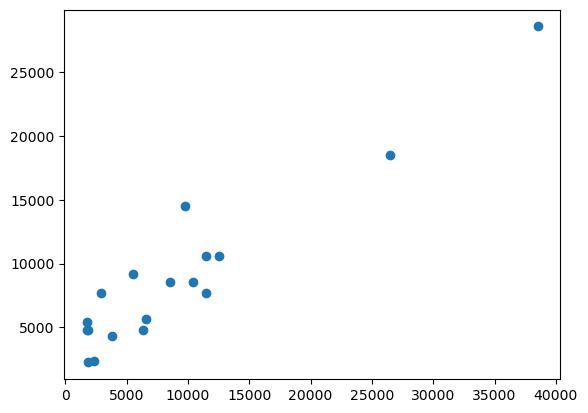

In [41]:
rf=RandomForestRegressor(n_estimators=200,min_samples_split=2,max_features=8,max_depth=None)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
score=r2_score(y_test,y_pred)
print("R2 Score:{:.4f}".format(score))
plt.scatter(y_test,y_pred)

In [42]:
pred_df=pd.DataFrame({"actual":y_test,"predicted":y_pred,"difference":y_test-y_pred})
pred_df

,actual,predicted,difference
4,11500,7738.100000,3761.900000
62,6580,5679.937500,900.062500
18,10450,8592.794167,1857.205833
0,1750,5458.837500,-3708.837500
28,26500,18538.547500,7961.452500
50,6350,4782.400000,1567.600000
10,9760,14504.859405,-4744.859405
34,12500,10582.600000,1917.400000
12,1850,4819.175000,-2969.175000
54,1850,2256.100000,-406.100000
